In [69]:
import numpy as np
import random 
import math
import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from io import StringIO


DIM = 16
#numbersOfRobots = 10

# БЛОК НАХОЖДЕНИЯ СТОРОНЫ КВАДРАТА

***Функция для нахождения степени двойки:***  
Рекурсивно просматриваем степени двойки, пока не найдем ближайшее число, большее исходного.
Входные параметры: a - исходное число, b - рассматриваемая степень двойки.

In [2]:
def powerOfTwo(a, b = 1):
    if (a > (2 ** b)):
        return powerOfTwo(a, b + 1)
    else:
        return 2**b

# БЛОК АЛГОРИТМА Diamond-Square

***Функция для генерации значений на карте:***  
Рекурсивная реализация алгоритма Diamond-Square на карте. Алгоритм:

Шаг 1. Шаг square. Нахождение срединной точки, присваивание ей значения, на основе среднего от угловых, плюс случайное число.

Шаг 2. Шаг diamond. Нахождение срединных точек для ромбов отмеченных черными точками (на этом шаге, по одной точке каждого ромба выходят за пределы массива)

Шаг 3. square. Для каждого квадрата (на этом шаге их 4), повторяем шаг № 2.

Шаг 4. diamond. Повторяем шаг № 3 для каждого ромба. У ромбов, имеющих точки на краю массива, одна из точек выходит за пределы массива.

In [3]:
'''
def fillTheMap(myMap, maxSize, size):
    x, y, half = size // 2, size // 2, size // 2
    scale = 0.7 * size
    if (half < 1):
        return myMap
    for y in range(half, maxSize, size):
        for x in range(half, maxSize, size):
           squareStep(myMap, x, y, half, int(random.random() * scale * 4 - scale))
        
    #print(myMap, "\n")
        
    for y in range(0, maxSize + 1, half):
        for x in range((y + half) % size, maxSize + 1, size):
           diamondStep(myMap, x, y, half, maxSize, int(random.random() * scale * 4 - scale))
        
    #print(myMap, "\n")
        
    fillTheMap(myMap, maxSize, size // 2)
'''
def fillTheMap(myMap, maxSize, size):
    x, y, half = size // 2, size // 2, size // 2
    if (half < 1):
        return myMap
    for y in range(half, maxSize, size):
        for x in range(half, maxSize, size):
            squareStep(myMap, x, y, half, int(random.uniform(0, 1) * size * 0.3))
        
    for y in range(0, maxSize + 1, half):
        for x in range((y + half) % size, maxSize + 1, size):
            diamondStep(myMap, x, y, half, maxSize, int(random.uniform(0, 1) * size * 0.3))
        
    fillTheMap(myMap, maxSize, size // 2)


***Функция для проверки значения на карте:***  
Проверяем, принадлежит ли точка с координатами (x;y) карте. В случае, если не принадлежит, результатом является -1, иначе возвращается значение этой точки на карте

In [4]:
def check(myMap, x, y, maxSize):
    if x < 0 or x > maxSize or y < 0 or y > maxSize:
        return -1
    else:
        return myMap[x][y]

***Функция для шага Square:***  
Происходит суммирование значений, стоящих в углах квадрата, после чего происходит их усреднение и увеличение на величину offset

In [5]:
def squareStep(myMap, x, y, size, offset):
    myMap[x][y] = (myMap[x+size][y+size] +  myMap[x-size][y+size] + myMap[x+size][y-size] + myMap[x-size][y-size]) // 4 + offset
    return myMap

***Функция для шага Diamond:***  
Происходит проверка на принадлежность всех точек ромба карте. В случае, если были обнаружены, которые не принадлежат ромбу, они убираются из рассмотрения. По оставшимся точкам происходим суммирование с дальнейшим усреднением и увеличением на величину offset

In [6]:
def diamondStep(myMap, x, y, size, maxSize, offset):
    res = np.array([check(myMap, x, y+size, maxSize), check(myMap, x, y-size, maxSize), 
           check(myMap, x+size, y, maxSize), check(myMap, x-size, y, maxSize)])
    value, length = 0, 0
    for i in range(len(res)):
        if res[i] != -1:
            value += res[i]
            length += 1
    myMap[x][y] = value // length + offset
    return myMap

0 16


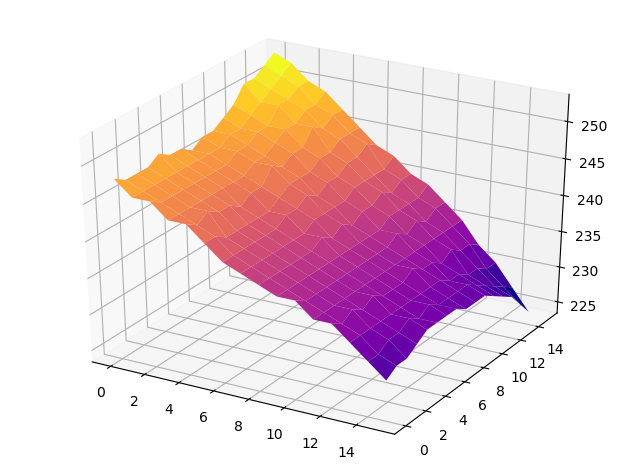

In [80]:
size = powerOfTwo(DIM) 
myMap = np.zeros((size + 1, size + 1))



myMap[0][0] = random.randint(200, 300)
myMap[0][size] = random.randint(200, 300)
myMap[size][0] = random.randint(200, 300) 
myMap[size][size] = random.randint(200, 300) 

fillTheMap(myMap, size, size)

#myMap = myMap[0:DIM, 0:DIM]
myMap = myMap[(size - DIM) // 2 : (size - DIM) // 2 + DIM, (size - DIM) // 2 : (size - DIM) // 2 + DIM]
print((size - DIM) // 2, (size - DIM) // 2 + DIM)

figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

x = np.arange(0, DIM)
y = np.arange(0, DIM)

X, Y = np.meshgrid(x, y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, myMap, cmap='plasma', edgecolor='none')

plt.show()

# БЛОК ФУНКЦИЙ АЛГОРИТМА A*

***Алгоритм для функции h:***  
Данная функция является эвристикой, которая находит манхэттеновское расстояние от рассматриваемой точки до точки end

In [11]:
def h(myMap, xStart, yStart, xEnd, yEnd):
    #return np.abs(xEnd - xStart) + np.abs(yEnd - yStart) + np.abs(myMap[int(xStart)][int(yStart)] - myMap[int(xEnd)][int(yEnd)])
    return int(np.sqrt((xEnd - xStart)**2 + (yEnd - yStart)**2 + (myMap[int(xStart)][int(yStart)] - myMap[int(xEnd)][int(yEnd)])**2))

***Функция поиска минимума среди матрицы F:***  
Данная функция используется в алгоритме A* для поиска минимального значения в матрице F среди всех значения из массива openedPoints

In [12]:
def minF(openedPoints, masF):
    res = 1000000000000000000000000000
    x, y = 0, 0
    for i in range(len(openedPoints)):
        if(masF[int(openedPoints[i][0])][int(openedPoints[i][1])] < res):
            res = masF[int(openedPoints[i][0])][int(openedPoints[i][1])]
            x = openedPoints[i][0]
            y = openedPoints[i][1]
    return x, y

***Функция удаления точки из массива openedPoints:***  
Данная функция используется в алгоритме A* для удаления рассматриваемой точки из массива openedPoints

In [13]:
def removeFromOpenedPoints(openedPoints, x, y):
    for i in range(len(openedPoints)):
        if (openedPoints[i][0] == x) and (openedPoints[i][1] == y):
            return i
    return -1

***Функция для поиска соседей точки, которых еще нет в массиве closedPoints:***  
Данная функция используется в алгоритме A* для поиска соседей точки, которых еще нет в массиве closedPoints для дальнейшего прохождения в пункте "foreach neighbour in unclosed_neighbours(curr)"

In [14]:
def searchNeighboursInClosedPoints(closedPoints, x, y, length):
    res = np.empty((0,2))
    if (x-1) >= 0:
        flag = 0
        for i in range(len(closedPoints)):
            if closedPoints[i][0] == x-1 and closedPoints[i][1] == y:
                flag = 1
        if flag == 0:
            res = np.append(res, np.array([[x-1, y]]), axis=0)
            
    if (x+1) < length:
        flag = 0
        for i in range(len(closedPoints)):
            if closedPoints[i][0] == x+1 and closedPoints[i][1] == y:
                flag = 1
        if flag == 0:
            res = np.append(res, np.array([[x+1, y]]), axis=0)
        
    if (y-1) >= 0:
        flag = 0
        for i in range(len(closedPoints)):
            if closedPoints[i][0] == x and closedPoints[i][1] == y-1:
                flag = 1
        if flag == 0:
            res = np.append(res, np.array([[x, y-1]]), axis=0)
        
    if (y+1) < length:
        flag = 0
        for i in range(len(closedPoints)):
             if closedPoints[i][0] == x and closedPoints[i][1] == y+1:
                flag = 1
        if flag == 0:
            res = np.append(res, np.array([[x, y+1]]), axis=0)
    return res

***Функция для поиска соседей точки, в массиве openedPoints:***  
Данная функция используется в алгоритме A* для поиска соседа точки в массиве openedPoints. В случае нахождения, возвращает значение true

In [15]:
def searchNeighboursInOpen(openedPoints, x, y):
    for i in range(len(openedPoints)):
        if openedPoints[i][0] == x and openedPoints[i][1] == y:
            return True
    return False

***Алгоритм A****


In [16]:
def aStar(myMap, xStart, yStart, xEnd, yEnd):
    
    x, y = xStart, yStart #в дальнейшем именно переменные x и y будут обновляться при движении по алгоритму
    
    closedPoints = np.empty((0,2)) #VAR CLOSED = EMPTY()
    openedPoints = np.empty((0,2), dtype=int)
    openedPoints = np.append(openedPoints, np.array([[x, y]]), axis=0) #VAR OPEN = LIST(START)
    fromPoints = np.empty((2,len(myMap),len(myMap))) #VAR FROM = MAP(NULL)
    fromPoints = fromPoints #+ 10000
    
    masG = np.zeros((len(myMap), len(myMap))) #массив для значений функции G
    masG = masG + 100000000000000
    masG[x][y] = 0
    masF = np.zeros((len(myMap), len(myMap))) #массив для значений функции F
    masF = masF + 100000000000000
    
    masF[x][y] = masG[x][y] + h(myMap, x, y, xEnd, yEnd) #F[START] = G[START] + h(START, END)
    while(len(openedPoints) > 0): #WHILE (OPEN)
        x, y = minF(openedPoints, masF) #CURR = MIN_F(OPEN)
        if (x == xEnd) and (y == yEnd): #IF (CURR=END)
            return fromPoints #RETURN success
        openedPoints = np.delete(openedPoints, removeFromOpenedPoints(openedPoints, x, y), 0) #REMOVE(CURR,OPEN)
        closedPoints = np.append(closedPoints, np.array([[x, y]]), axis=0) #ADD(CURR, CLOSED)
        #print(len(closedPoints), len(np.unique(closedPoints, axis=0)))
        
        neighbours = searchNeighboursInClosedPoints(closedPoints, x, y, len(myMap)) #UNCLOSED_NEIGHBOURS(CURR)
        
        for i in range(len(neighbours)): #FOREACH NEIGHBOUR IN UNCLOSED_NEIGHBOURS(CURR)
            #tempG = masG[int(x),int(y)] + h(myMap, x, y, neighbours[i][0], neighbours[i][1]) #TEMP_G = G[CURR] + DIST(CURR,NEIGHBOUR)
            tempG = masG[int(x),int(y)] + np.abs(myMap[int(x)][int(y)] - myMap[int(neighbours[i][0])][int(neighbours[i][1])]) #TEMP_G = G[CURR] + DIST(CURR,NEIGHBOUR)
            if (searchNeighboursInOpen(openedPoints, neighbours[i][0], neighbours[i][1]) == False) or (tempG < masG[int(neighbours[i][0])][int(neighbours[i][1])]): #IF (NEIGHBOUR NOT IN OPEN OR TEMP_G < G[NEIGHBOUR])
                fromPoints[0][int(neighbours[i][0])][int(neighbours[i][1])] = x 
                fromPoints[1][int(neighbours[i][0])][int(neighbours[i][1])] = y #FROM[NEIGHBOURS] = CURR (эта строка и та, что выше)
                masG[int(neighbours[i][0])][int(neighbours[i][1])] = tempG #G[NEIGHBOUR] = TEMP_G
                masF[int(neighbours[i][0])][int(neighbours[i][1])] = masG[int(neighbours[i][0])][int(neighbours[i][1])] + h(myMap, neighbours[i][0], neighbours[i][1], xEnd, yEnd) #F[NEIGHBOUR] = G[NEIGHBOUR] + h(NEIGHBOUR, END)
            if searchNeighboursInOpen(openedPoints, neighbours[i][0], neighbours[i][1]) == False: #IF NEIGHBOUR NOT IN OPEN
                openedPoints = np.append(openedPoints, np.array([[neighbours[i][0], neighbours[i][1]]]), axis=0) #ADD(NEIGHBOUR, OPEN)
    return np.ones((2,len(myMap),len(myMap)))

***Функция восстановления пути:***  
Данная функция восстанавливает путь от начальной точки до конечной

In [17]:
def recoveryPath(myMap, xStart, yStart, xEnd, yEnd):
    path = np.empty((0,2))
    x, y = xEnd, yEnd
    path = np.append(path, np.array([[x, y]]), axis=0)
    while (x != xStart) or (y != yStart):
        newX = myMap[0][x][y]
        newY = myMap[1][x][y]
        x, y = newX, newY
        #print(x, y, xStart, yStart)
        path = np.append(path, np.array([[x, y]]), axis=0)
    return path

***Функция поиска стоимости пути:***  
Данная функция находит расстояние, которое пройдет робот на выбранном маршруте

In [18]:
def lengthOfPath(myMap, path):
    length = 0
    for i in range(len(path)-1):
        length = length + abs(myMap[path[i][0]][path[i][1]] - myMap[path[i+1][0]][path[i+1][1]]) + 1 #добавляем единицу за переход между вертикалью и горизонталью (а также во избежания нулевого пути)
    return length

***Функция генерации начальных и целевых точек для роботов:***  
В данной функции происходит генерация неповторяющихся начальных и конечных точек для роботов

In [19]:
def generateStartAndEndPoints(myMap, numbersOfRobots):
    robotsPoints = np.empty((0,2))
    endPoints = np.empty((0,2))
    #n = numbersOfRobots * 2 #умножаем на 2, так как общее число точек, которое необходимо сгененрировать, равно количеству роботов (их начальная позиция) и такое же количество целевых точек
    while(len(robotsPoints) != numbersOfRobots):
        flag = 0
        x = random.randint(0, len(myMap) - 1)
        y = random.randint(0, len(myMap) - 1)
        for i in range(len(robotsPoints)):
            if robotsPoints[i][0] == x and robotsPoints[i][1] == y:
                flag = 1
        if flag == 0:
            robotsPoints = np.append(robotsPoints, np.array([[x, y]]), axis=0)
            
    while(len(endPoints) != numbersOfRobots):
        flag = 0
        x = random.randint(0, len(myMap) - 1)
        y = random.randint(0, len(myMap) - 1)
        for i in range(len(robotsPoints)):
            if robotsPoints[i][0] == x and robotsPoints[i][1] == y:
                flag = 1
        for i in range(len(endPoints)):
            if endPoints[i][0] == x and endPoints[i][1] == y:
                flag = 1
        if flag == 0:
            endPoints = np.append(endPoints, np.array([[x, y]]), axis=0)
    return robotsPoints, endPoints

***Функция распределения путей между роботами:***  
Реализация алгоритма распределения целей в группе роботов

In [20]:
def pathSelection(matrix, numbersOfRobots):
    selection = np.empty((0,2), dtype=int)
    i = 0
    while(len(selection) != numbersOfRobots):
        #print(matrix)
        j, rowMaximum, columnMaximum, flag = 0, 0, 0, 0
        rowMaximum = np.max(matrix[i])
        while(matrix[i][j] != rowMaximum):
            j = j + 1
        columnMaximum = np.max(matrix[:, j])
        if rowMaximum >= columnMaximum and columnMaximum != 0:
            selection = np.append(selection, np.array([[i, j]]), axis=0)
            for k in range(len(matrix)):
                matrix[:, j] = 0
                matrix[i] = 0
            i = 0
            flag = 1
        if flag != 1:
            i = i + 1
    return selection
            

# ГЛАВНАЯ ФУНКЦИЯ

***Сохранение карт в файл:***  

In [ ]:
'''
size = powerOfTwo(DIM) 
myMap = np.zeros((size + 1, size + 1))

for i in range (10):

    myMap[0][0] = random.randint(200, 300)
    myMap[0][size] = random.randint(200, 300)
    myMap[size][0] = random.randint(200, 300) 
    myMap[size][size] = random.randint(200, 300) 
    
    fillTheMap(myMap, size, size)

    #myMap = myMap[0:DIM, 0:DIM]
    myMap = myMap[(size - DIM) // 2 : (size - DIM) // 2 + DIM, (size - DIM) // 2 : (size - DIM) // 2 + DIM]
    print((size - DIM) // 2, (size - DIM) // 2 + DIM)

    figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

    x = np.arange(0, DIM)
    y = np.arange(0, DIM)

    X, Y = np.meshgrid(x, y)

    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, myMap, cmap='plasma', edgecolor='none')

    plt.show()
    np.savetxt('myMap' + str(i) + '.txt', myMap)
    
    myMap = np.zeros((size + 1, size + 1))

'''

***Отрисовка существующих карт*** 

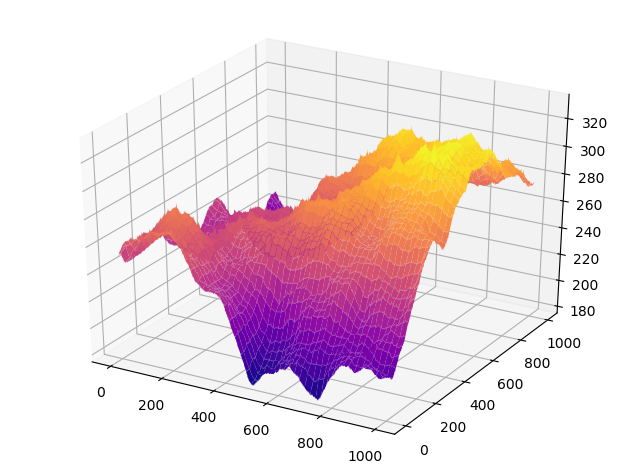

In [152]:
myMap = np.loadtxt('1000/myMap2.txt')

DIM = len(myMap)

figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

x = np.arange(0, DIM)
y = np.arange(0, DIM)

X, Y = np.meshgrid(x, y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, myMap, cmap='plasma', edgecolor='none')

plt.show()

***Отрисовка маршрута на карте***

[[ 40 105  74 109  62]
 [ 31  82  65  86  47]
 [ 45  32  19  36  19]
 [ 75  38  65  42  65]
 [ 39  90  51  98  41]] 


[[0 3]
 [3 0]
 [4 1]
 [1 2]
 [2 4]]


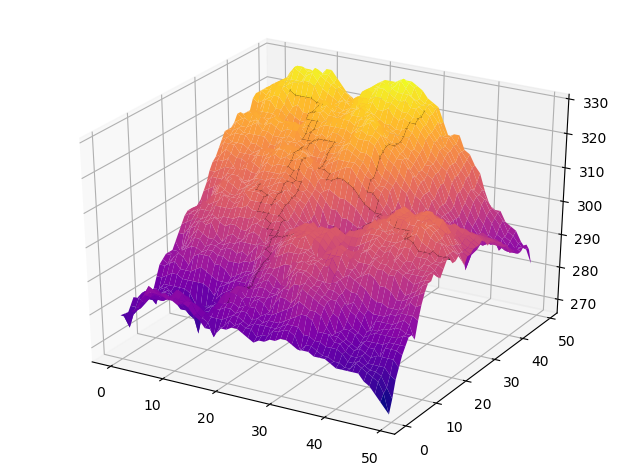

In [149]:
myMap = np.loadtxt('50/myMap2.txt')

DIM = len(myMap)

st, en = generateStartAndEndPoints(myMap, 5)
st = st.astype(int)
en = en.astype(int)

efficiencMatrix = np.zeros((len(st), len(st)))

for i in range(len(st)):
    for j in range(len(st)):
        resOfAStar = aStar(myMap, st[i][0], st[i][1], en[j][0], en[j][1])
        resOfAStar = resOfAStar.astype(int)

        unreversePath = recoveryPath(resOfAStar, st[i][0], st[i][1], en[j][0], en[j][1])

        path = np.flip(unreversePath, 0)
        path = path.astype(int)
    
        np.savetxt('data/Path' + str(i) + str(j) + '.txt', path)
        efficiencMatrix[i][j] = lengthOfPath(myMap, path)
        

        
efficiencMatrix = efficiencMatrix.astype(int) 
print(efficiencMatrix, '\n\n')

result = pathSelection(efficiencMatrix, 5)
print(result)

firstPath = np.loadtxt('data/Path' + str(result[0][0]) + str(result[0][1]) + '.txt')
firstPath = firstPath.astype(int)
secondPath = np.loadtxt('data/Path' + str(result[1][0]) + str(result[1][1]) + '.txt')
secondPath = secondPath.astype(int)
thirdPath = np.loadtxt('data/Path' + str(result[2][0]) + str(result[2][1]) + '.txt')
thirdPath = thirdPath.astype(int)
forthPath = np.loadtxt('data/Path' + str(result[3][0]) + str(result[3][1]) + '.txt')
forthPath = forthPath.astype(int)
fifthPath = np.loadtxt('data/Path' + str(result[4][0]) + str(result[4][1]) + '.txt')
fifthPath = fifthPath.astype(int)

zdata0 = np.zeros(len(firstPath))
ydata0 = np.zeros(len(firstPath))
xdata0 = np.zeros(len(firstPath))
zdata1 = np.zeros(len(secondPath))
ydata1 = np.zeros(len(secondPath))
xdata1 = np.zeros(len(secondPath))
zdata2 = np.zeros(len(thirdPath))
ydata2 = np.zeros(len(thirdPath))
xdata2 = np.zeros(len(thirdPath))
zdata3 = np.zeros(len(forthPath))
ydata3 = np.zeros(len(forthPath))
xdata3 = np.zeros(len(forthPath))
zdata4 = np.zeros(len(fifthPath))
ydata4 = np.zeros(len(fifthPath))
xdata4 = np.zeros(len(fifthPath))

for i in range(len(firstPath)):
    zdata0[i] = myMap[firstPath[i][0]][firstPath[i][1]]
    ydata0[i] = firstPath[i][0]
    xdata0[i] = firstPath[i][1]
    
for i in range(len(secondPath)):
    zdata1[i] = myMap[secondPath[i][0]][secondPath[i][1]]
    ydata1[i] = secondPath[i][0]
    xdata1[i] = secondPath[i][1]
    
for i in range(len(thirdPath)):
    zdata2[i] = myMap[thirdPath[i][0]][thirdPath[i][1]]
    ydata2[i] = thirdPath[i][0]
    xdata2[i] = thirdPath[i][1]
    
for i in range(len(forthPath)):
    zdata3[i] = myMap[forthPath[i][0]][forthPath[i][1]]
    ydata3[i] = forthPath[i][0]
    xdata3[i] = forthPath[i][1]
    
for i in range(len(fifthPath)):
    zdata4[i] = myMap[fifthPath[i][0]][fifthPath[i][1]]
    ydata4[i] = fifthPath[i][0]
    xdata4[i] = fifthPath[i][1]

figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

x = np.arange(0, DIM)
y = np.arange(0, DIM)

X, Y = np.meshgrid(x, y)

ax = plt.axes(projection='3d')

ax.plot(xdata0, ydata0, zdata0, color='black', linewidth=2)
ax.plot(xdata1, ydata1, zdata1, color='black', linewidth=2)
ax.plot(xdata2, ydata2, zdata2, color='black', linewidth=2)
ax.plot(xdata3, ydata3, zdata3, color='black', linewidth=2)
ax.plot(xdata4, ydata4, zdata4, color='black', linewidth=2)
#ax.view_init(0, 0)
ax.plot_surface(X, Y, myMap, cmap='plasma', edgecolor='none')
plt.show()

***Функция для запуска работы алгоритма:***  

In [ ]:
folder = [1000]#[25, 50], [100, 250, 500, 1000]
#numbersOfRobots = [5, 10, 20, 50]
numbersOfRobots = [20, 50]
for iterForFolder in range(len(folder)):
    for iterForNumbersOfRobots in range(len(numbersOfRobots)):
        for iterForTenTimesGeneration in range(10):
            print(folder[iterForFolder], iterForTenTimesGeneration)
            myMap = np.loadtxt(str(folder[iterForFolder]) + '/myMap' + str(iterForTenTimesGeneration) + '.txt')

            DIM = len(myMap)

            #сгенерировали начальные точки роботов и целевые точки
            st, en = generateStartAndEndPoints(myMap, numbersOfRobots[iterForNumbersOfRobots])
            st = st.astype(int)
            en = en.astype(int)
            #содали пустую матрицу эффективности, где строка соответствует рассматриваемому роботу, а значение в строке - 
            #эффективность его прохода до конечной точки. Пример: вторая строка 10 20 30 показывает, что расстояние от позиции 
            #второго робота до нулевой точки равно 10, до первой - 20, до третьей - 30.
            #'''
            efficiencMatrix = np.zeros((len(st), len(st)))
            startTime = time.time()
            for i in range(len(st)):
                for j in range(len(st)):
                    resOfAStar = aStar(myMap, st[i][0], st[i][1], en[j][0], en[j][1])
                    resOfAStar = resOfAStar.astype(int)

                    unreversePath = recoveryPath(resOfAStar, st[i][0], st[i][1], en[j][0], en[j][1])

                    path = np.flip(unreversePath, 0)
                    path = path.astype(int)

                    efficiencMatrix[i][j] = lengthOfPath(myMap, path)
                    if(efficiencMatrix[i][j] == 0):
                        print('xStart = ', st[i][0], ' yStart = ', st[i][1])
                        print('xEnd = ', en[j][0], ' yEnd = ', en[j][1])
                        print(path)

            file = open('Results/' + str(folder[iterForFolder]) + '/Folder' + str(folder[iterForFolder]) + '[rob' + str(numbersOfRobots[iterForNumbersOfRobots]) + ']' + 
                        str(iterForTenTimesGeneration) + '.txt','w') 
            file.write("Time to find:\n")
            file.write(str(time.time() - startTime) + '\n') 


            startTime = time.time()

            efficiencMatrix = efficiencMatrix.astype(int) 
            print(efficiencMatrix, '\n\n')

            result = pathSelection(efficiencMatrix, numbersOfRobots[iterForNumbersOfRobots])

            file.write("Distribution between robots:\n")
            file.write(str(time.time() - startTime)) 
            file.close()

            for i in range(len(result)):
                print('robot ', result[i][0], 'to point ', result[i][1])

***Парсер файлов с сохраненнным временем:***  

In [ ]:
folder = [25, 50, 100, 250, 500, 1000]
numbersOfRobots = [5, 10, 20, 50]
for iterForFolder in range(len(folder)):
    aStarFile = open('Results/' + str(folder[iterForFolder]) + '/allAstar.txt','w')
    pathSelectionFile = open('Results/' + str(folder[iterForFolder]) + '/allPathSelection.txt','w')
    for iterForNumbersOfRobots in range(len(numbersOfRobots)):
        for iterForTenTimesGeneration in range(10):
            file = open('Results/' + str(folder[iterForFolder]) + '/Folder' + str(folder[iterForFolder]) + '[rob' + str(numbersOfRobots[iterForNumbersOfRobots]) + ']' + 
                        str(iterForTenTimesGeneration) + '.txt','r') 
            for i, line in enumerate(file):
                if (i == 1):
                    aStarFile.write(line)
                if (i == 3):
                    pathSelectionFile.write(line)
                    pathSelectionFile.write('\n')
        aStarFile.write('\n')
        pathSelectionFile.write('\n')
    aStarFile.close()
    pathSelectionFile.close()